In these plots I track the energy convergence for 4 specific delta values in detail. These values are $-1.545, 4.455, 4.955, 13.455$ and respectively place our system in the disordered phase, just below the phase transition, just above the phase transition, and in the checkerboard phase. In some cases, I will also look at the variance over the training procedure, as that is often indicative of whether or not our model is converged.

In [1]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

# Dependencies

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

# Read in Data

In [3]:
basepath = './../data/N_256/Figure2/'
oned = 'OneD_rnn/delta_'
twod = 'TwoD_rnn/delta_'
Energy = '/Energy.npy'
Variance = '/Variance.npy'
VMC = '/VMC_only'
seed_100 = '/seed_100'
hybrid = '/hybrid_training/'
ds = '_datasteps'

### QMC Data

Here, we care about the QMC energies for these four delta values.

In [4]:
df = pd.read_csv('./../data/N_256/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [5]:
qmcE_m1545 = np.array(df["energy"])[np.where(df["delta"]==delta_m1545)]
Eerr_m1545 = np.array(df["energy_error"])[np.where(df["delta"]==delta_m1545)]
qmcE_4455 = np.array(df["energy"])[np.where(df["delta"]==delta_4455)]
Eerr_4455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4455)]
qmcE_4955 = np.array(df["energy"])[np.where(df["delta"]==delta_4955)]
Eerr_4955 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4955)]
qmcE_13455 = np.array(df["energy"])[np.where(df["delta"]==delta_13455)]
Eerr_13455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_13455)]

In [6]:
print(f"for delta = {delta_m1545}, E = {qmcE_m1545} +/- {Eerr_m1545}")
print(f"for delta = {delta_4455}, E = {qmcE_4455} +/- {Eerr_4455}")
print(f"for delta = {delta_4955}, E = {qmcE_4955} +/- {Eerr_4955}")
print(f"for delta = {delta_13455}, E = {qmcE_13455} +/- {Eerr_13455}")

for delta = -1.545, E = [-0.99374612] +/- [0.00049089]
for delta = 4.455, E = [-2.13533618] +/- [0.00047135]
for delta = 4.955, E = [-2.28004338] +/- [0.00048113]
for delta = 13.455, E = [-5.84297289] +/- [0.00059773]


### RNN Data

##### One D RNN, delta = -1.545

In [7]:
d_m1545_1d_VMC = np.load(basepath+oned+d_m1545+seed_100+VMC+Energy)
d_m1545_1d_VMC_var = np.load(basepath+oned+d_m1545+seed_100+VMC+Variance)

d_m1545_1d_data = np.load(basepath+oned+d_m1545+seed_100+Energy)

d_m1545_1d_hybrid = np.atleast_2d(np.load(basepath+oned+d_m1545+seed_100+hybrid+'200'+ds+Energy)[0:10000])
d_m1545_1d_hybrid = np.append(d_m1545_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_m1545+seed_100+hybrid+'400'+ds+Energy)[0:10000]),axis=0)
d_m1545_1d_hybrid = np.append(d_m1545_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_m1545+seed_100+hybrid+'600'+ds+Energy)[0:10000]),axis=0)
d_m1545_1d_hybrid = np.append(d_m1545_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_m1545+seed_100+hybrid+'800'+ds+Energy)[0:10000]),axis=0)
d_m1545_1d_hybrid = np.append(d_m1545_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_m1545+seed_100+hybrid+'1000'+ds+Energy)[0:10000]),axis=0)


##### Two D RNN, delta = -1.545

In [8]:
d_m1545_2d_VMC = np.load(basepath+twod+d_m1545+seed_100+VMC+Energy)

d_m1545_2d_data = np.load(basepath+twod+d_m1545+seed_100+Energy)

d_m1545_2d_hybrid_sm = np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'10'+ds+Energy)[0:10000])
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'30'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'50'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'70'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'90'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'110'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'130'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'150'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'170'+ds+Energy)[0:10000]),axis=0)
d_m1545_2d_hybrid_sm = np.append(d_m1545_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_m1545+seed_100+hybrid+'190'+ds+Energy)[0:10000]),axis=0)


##### One D RNN, delta = 4.455

In [9]:
d_4455_1d_VMC = np.load(basepath+oned+d_4455+seed_100+VMC+Energy)
d_4455_1d_VMC_var = np.load(basepath+oned+d_4455+seed_100+VMC+Variance)

d_4455_1d_data = np.load(basepath+oned+d_4455+seed_100+Energy)

d_4455_1d_hybrid = np.atleast_2d(np.load(basepath+oned+d_4455+seed_100+hybrid+'200'+ds+Energy)[0:10000])
d_4455_1d_hybrid_var = np.load(basepath+oned+d_4455+seed_100+hybrid+'200'+ds+Variance)
d_4455_1d_hybrid = np.append(d_4455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4455+seed_100+hybrid+'400'+ds+Energy)[0:10000]),axis=0)
d_4455_1d_hybrid = np.append(d_4455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4455+seed_100+hybrid+'600'+ds+Energy)[0:10000]),axis=0)
d_4455_1d_hybrid = np.append(d_4455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4455+seed_100+hybrid+'800'+ds+Energy)[0:10000]),axis=0)
d_4455_1d_hybrid = np.append(d_4455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4455+seed_100+hybrid+'1000'+ds+Energy)[0:10000]),axis=0)


##### Two D RNN, delta = 4.455

In [10]:
d_4455_2d_VMC = np.load(basepath+twod+d_4455+seed_100+VMC+Energy)

d_4455_2d_data = np.load(basepath+twod+d_4455+seed_100+Energy)

d_4455_2d_hybrid_sm = np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'10'+ds+Energy)[0:10000])
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'30'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'50'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'70'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'90'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'110'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'130'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'150'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'170'+ds+Energy)[0:10000]),axis=0)
d_4455_2d_hybrid_sm = np.append(d_4455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4455+seed_100+hybrid+'190'+ds+Energy)[0:10000]),axis=0)


##### One D RNN, delta = 4.955

In [11]:
d_4955_1d_VMC = np.load(basepath+oned+d_4955+seed_100+VMC+Energy)

d_4955_1d_data = np.load(basepath+oned+d_4955+seed_100+Energy)

d_4955_1d_hybrid = np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'200'+ds+Energy)[0:10000])
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'400'+ds+Energy)[0:10000]),axis=0)
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'600'+ds+Energy)[0:10000]),axis=0)
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'800'+ds+Energy)[0:10000]),axis=0)
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'1000'+ds+Energy)[0:10000]),axis=0)
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'1200'+ds+Energy)[0:10000]),axis=0)
d_4955_1d_hybrid = np.append(d_4955_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_4955+seed_100+hybrid+'1400'+ds+Energy)[0:10000]),axis=0)


##### Two D RNN, delta = 4.955

In [12]:
d_4955_2d_VMC = np.load(basepath+twod+d_4955+seed_100+VMC+Energy)

d_4955_2d_data = np.load(basepath+twod+d_4955+seed_100+Energy)

d_4955_2d_hybrid_sm = np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'10'+ds+Energy)[0:10000])
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'30'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'50'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'70'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'90'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'110'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'130'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'150'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'170'+ds+Energy)[0:10000]),axis=0)
d_4955_2d_hybrid_sm = np.append(d_4955_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_4955+seed_100+hybrid+'190'+ds+Energy)[0:10000]),axis=0)


##### One D RNN, delta = 13.455

In [13]:
d_13455_1d_VMC = np.load(basepath+oned+d_13455+seed_100+VMC+Energy)
d_13455_1d_VMC_var = np.load(basepath+oned+d_13455+seed_100+VMC+Variance)

d_13455_1d_data = np.load(basepath+oned+d_13455+seed_100+Energy)

d_13455_1d_hybrid = np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'200'+ds+Energy)[0:10000])
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'400'+ds+Energy)[0:10000]),axis=0)
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'600'+ds+Energy)[0:10000]),axis=0)
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'800'+ds+Energy)[0:10000]),axis=0)
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'1000'+ds+Energy)[0:10000]),axis=0)
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'1200'+ds+Energy)[0:10000]),axis=0)
d_13455_1d_hybrid = np.append(d_13455_1d_hybrid,np.atleast_2d(np.load(basepath+oned+d_13455+seed_100+hybrid+'1400'+ds+Energy)[0:10000]),axis=0)


##### Two D RNN, delta = 13.455

In [14]:
d_13455_2d_VMC = np.load(basepath+twod+d_13455+seed_100+VMC+Energy)

d_13455_2d_data = np.load(basepath+twod+d_13455+seed_100+Energy)

d_13455_2d_hybrid_sm = np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'10'+ds+Energy)[0:10000])
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'30'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'50'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'70'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'90'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'110'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'130'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'150'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'170'+ds+Energy)[0:10000]),axis=0)
d_13455_2d_hybrid_sm = np.append(d_13455_2d_hybrid_sm,np.atleast_2d(np.load(basepath+twod+d_13455+seed_100+hybrid+'190'+ds+Energy)[0:10000]),axis=0)


# Plotting Function

In [15]:
def ma(values):
    weights = np.repeat(1.0, 50)/50
    sma = np.convolve(values, weights, 'valid')
    return sma

def plot_all(delta_val, VMC_train, Data_train,exactE, RNN_type, x_ax=[None,None],y_ax=[None,None],Hybrid_trains=np.array([None]),ds_start=100,ds_step=100):
    fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
    greens = plt.get_cmap('Greens')
    greens = greens(np.linspace(0, 1, 20))[10:]    
    plt.hlines(exactE,0,len(VMC_train),label='QMC energy',linestyle='--',color='k')
    plt.hlines(exactE+0.01,0,len(VMC_train),label='threshold',linestyle='--',color='grey')
    plt.plot(np.arange(len(ma(VMC_train))),ma(VMC_train),color='C0',label="VMC")
    plt.plot(np.arange(len(ma(Data_train))),ma(Data_train),color='C1',label="Data")
    if Hybrid_trains.any() != None:
        num_trains = np.shape(Hybrid_trains)[0]
        ds = ds_start
        for i in range(num_trains):
            plt.plot(np.arange(len(ma(Hybrid_trains[i,:]))),ma(Hybrid_trains[i,:]),color=greens[i],label=f'{ds} datasteps')
            ds+=ds_step
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    x_ax = np.array(x_ax)
    y_ax = np.array(y_ax)
    if x_ax.any() != None:
        plt.xlim(x_ax[0],x_ax[1])
    if y_ax.any() != None: 
        plt.ylim(y_ax[0],y_ax[1])
    plt.title(f'delta = {delta_val}, {RNN_type} RNN Energy Convergence',fontsize=25)
    plt.ylabel('$\\langle H \\rangle$',fontsize=20)
    plt.xlabel('training steps',fontsize=20)
    plt.show()
    
    
def plot_speedup(delta_val, VMC_train,exactE, RNN_type,Hybrid_trains,ds_start=100,ds_step=100):
    fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
    greens = plt.get_cmap('Greens')
    greens = greens(np.linspace(0, 1, 20))[10:]
    
    # Calculate t_converge
    thresh = 0.01
    tconv_VMC = np.where(ma(VMC_train)<=exactE+thresh)
    plt.scatter(0,tconv_VMC[0][0],marker='o',color='C0',label="VMC")
    num_trains = np.shape(Hybrid_trains)[0]
    ds = ds_start
    for i in range(num_trains):
        tconv = np.where(ma(Hybrid_trains[i,:])<=exactE+thresh)
        plt.scatter(ds,tconv[0][0],marker = 'd',color=greens[i],label=f'{ds} datasteps')
        ds+=ds_step
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'delta = {delta_val}, {RNN_type} RNN\n Convergence Speedup',fontsize=25)
    plt.ylabel('$ t_{conv} $',fontsize=20)
    plt.xlabel('$t_{trans}$',fontsize=20)
    plt.show()
    

# Results: One D RNNs

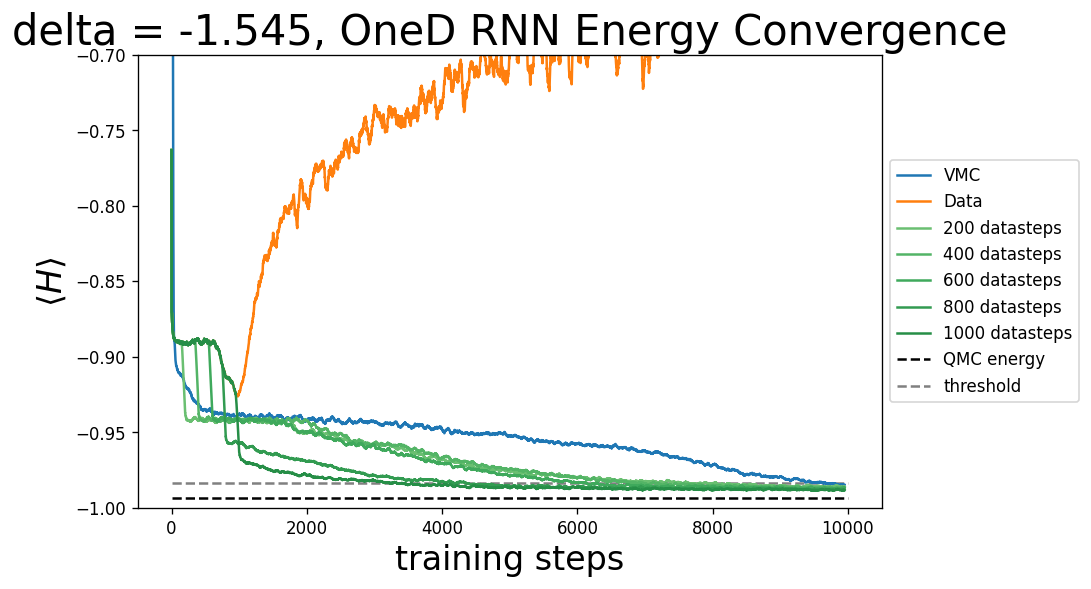

In [16]:
plot_all(d_m1545,d_m1545_1d_VMC,d_m1545_1d_data,qmcE_m1545,'OneD',[None,None],[-1,-0.7],d_m1545_1d_hybrid,200,200)

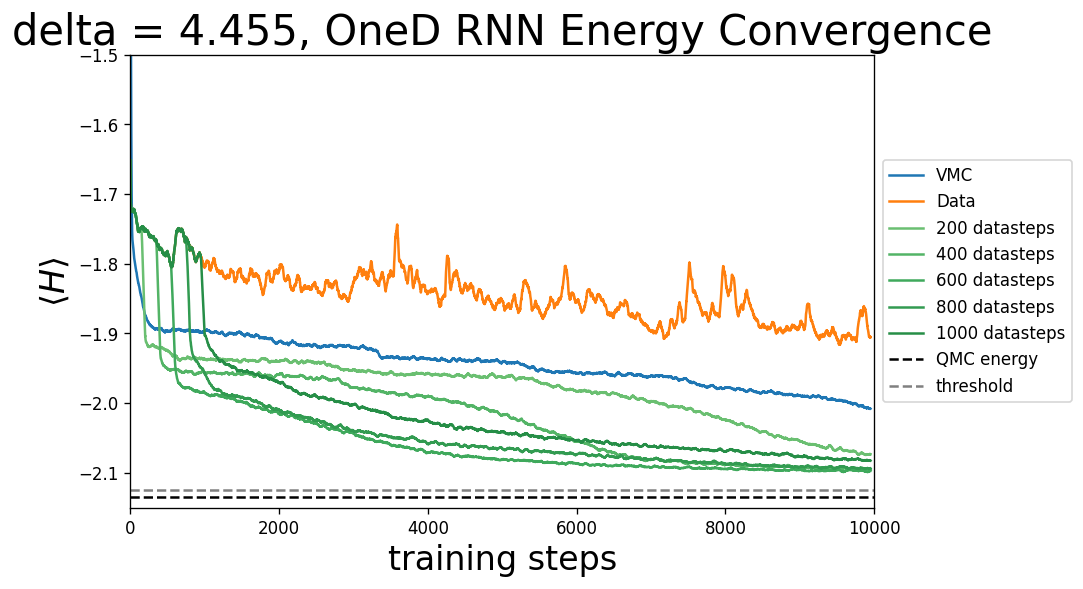

In [87]:
plot_all(d_4455,d_4455_1d_VMC,d_4455_1d_data,qmcE_4455,'OneD',[0,10000],[-2.15,-1.5],d_4455_1d_hybrid,200,200)

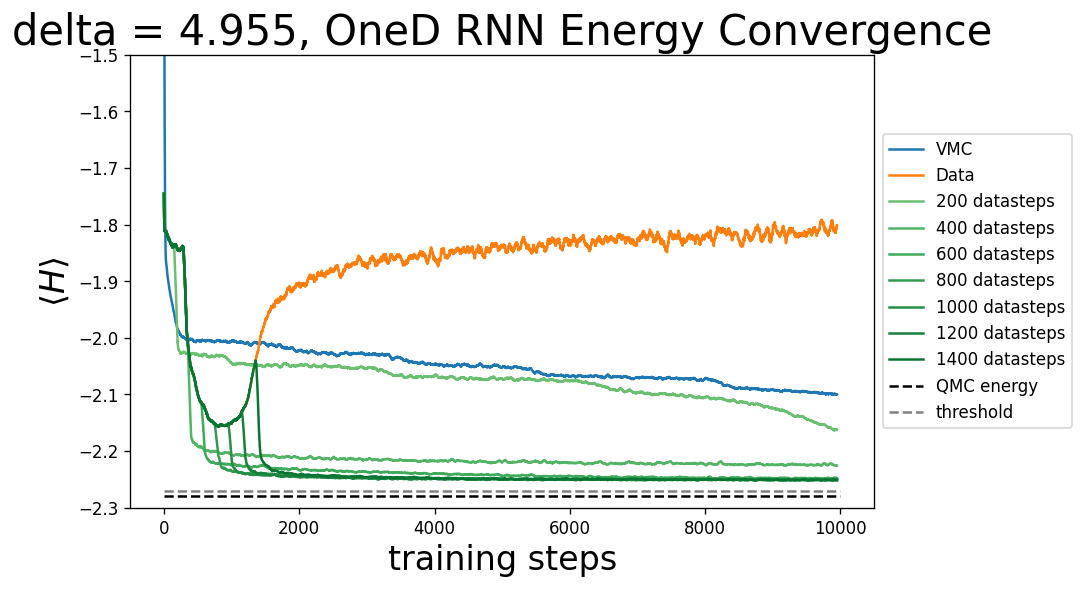

In [89]:
plot_all(d_4955,d_4955_1d_VMC,d_4955_1d_data,qmcE_4955,'OneD',[None,None],[-2.3,-1.5],d_4955_1d_hybrid,200,200)

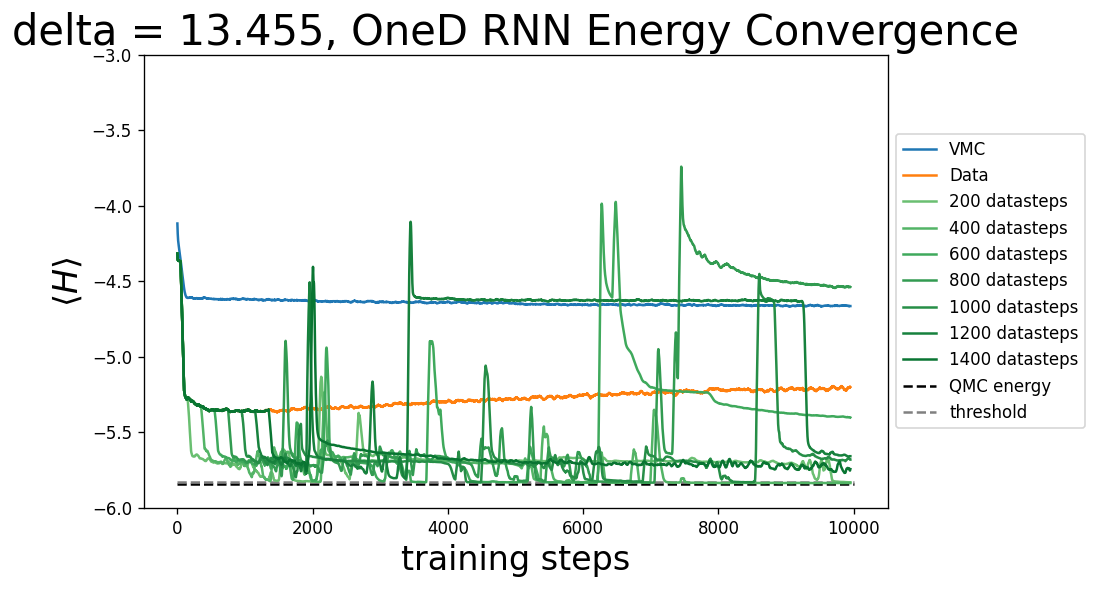

In [91]:
plot_all(d_13455,d_13455_1d_VMC,d_13455_1d_data,qmcE_13455,'OneD',[None,None],[-6,-3],d_13455_1d_hybrid,200,200)

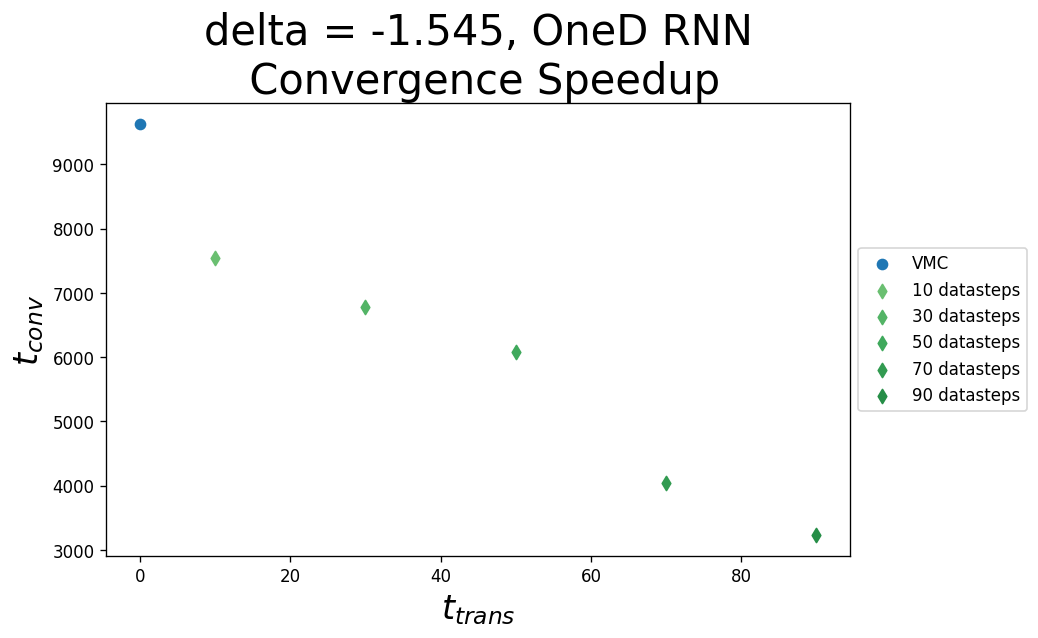

In [42]:
plot_speedup(d_m1545,d_m1545_1d_VMC,qmcE_m1545,'OneD',d_m1545_1d_hybrid,10,20)

# Results: Two D RNNs

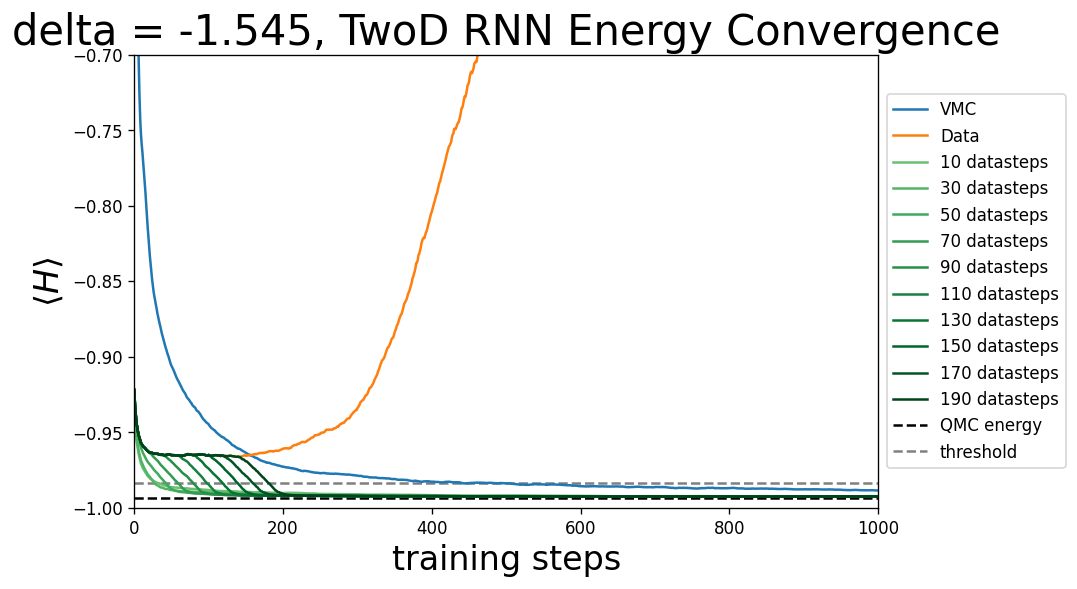

In [43]:
plot_all(d_m1545,d_m1545_2d_VMC,d_m1545_2d_data,qmcE_m1545,'TwoD',[0,1000],[-1,-0.7],d_m1545_2d_hybrid_sm,10,20)

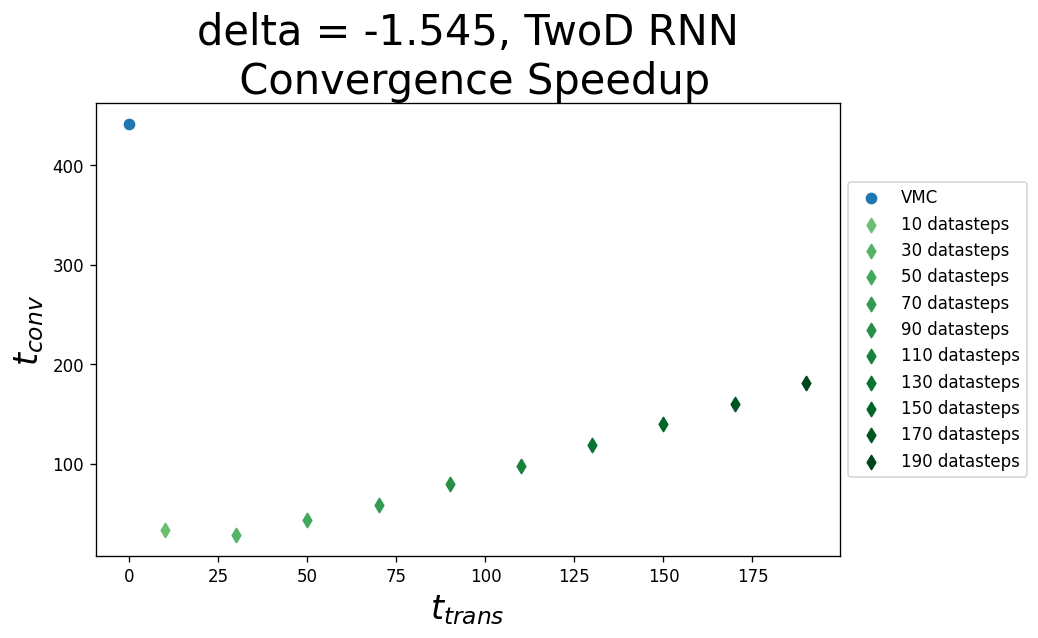

In [44]:
plot_speedup(d_m1545,d_m1545_2d_VMC,qmcE_m1545,'TwoD',d_m1545_2d_hybrid_sm,10,20)

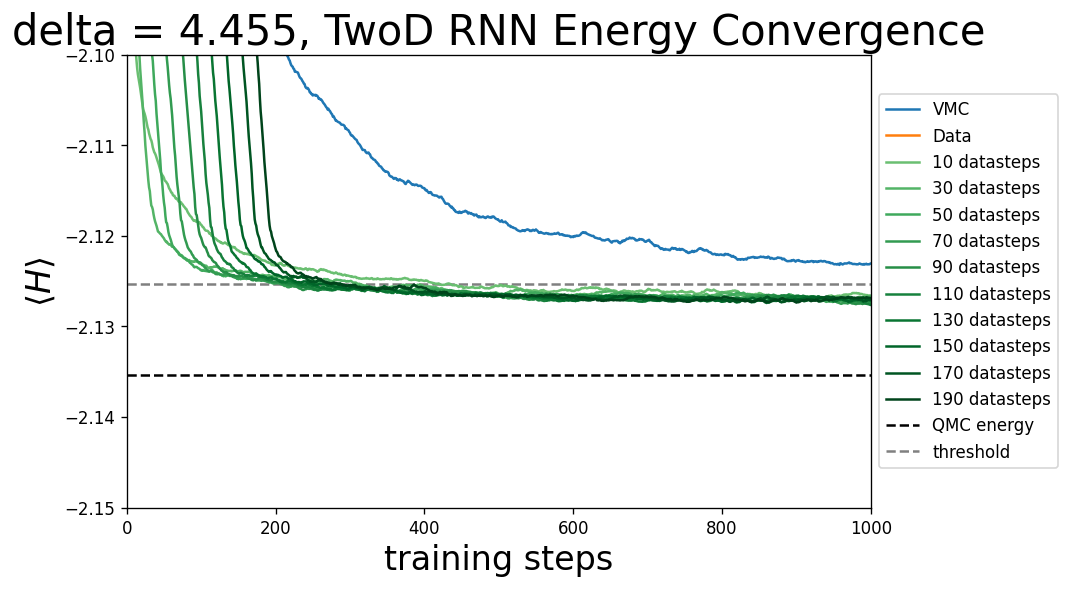

In [53]:
plot_all(d_4455,d_4455_2d_VMC,d_4455_2d_data,qmcE_4455,'TwoD',[0,1000],[-2.15,-2.1],d_4455_2d_hybrid_sm,10,20)

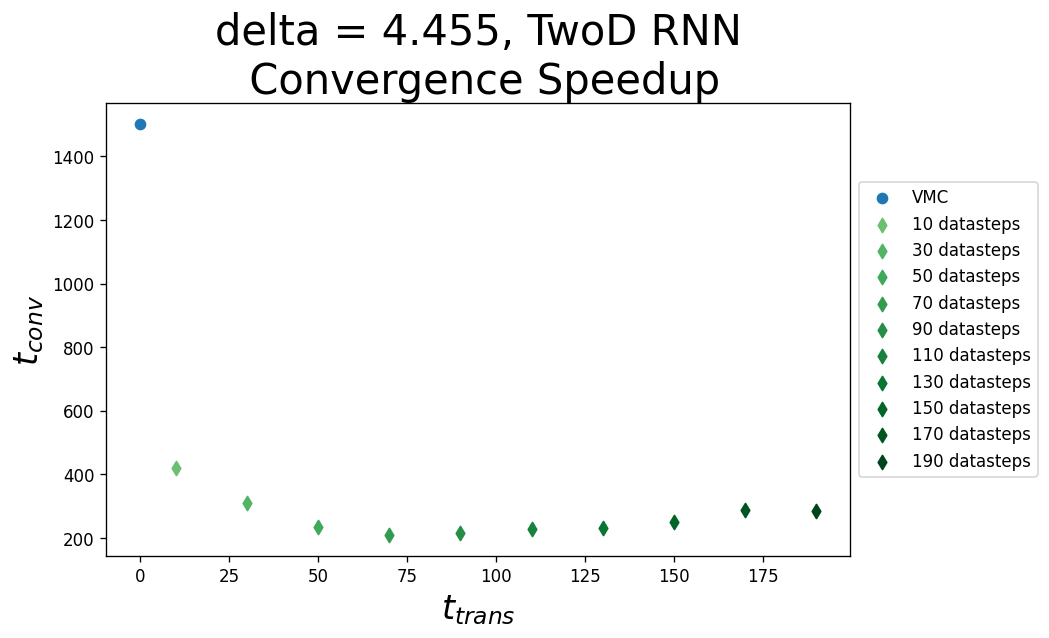

In [54]:
plot_speedup(d_4455,d_4455_2d_VMC,qmcE_4455,'TwoD',d_4455_2d_hybrid_sm,10,20)

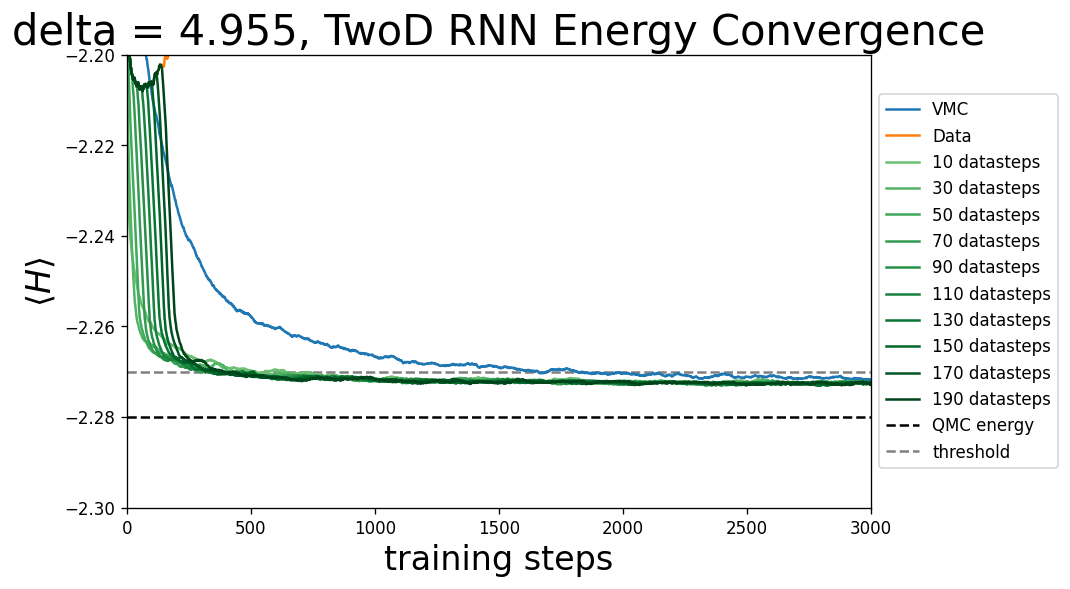

In [48]:
plot_all(d_4955,d_4955_2d_VMC,d_4955_2d_data,qmcE_4955,'TwoD',[0,3000],[-2.3,-2.2],d_4955_2d_hybrid_sm,10,20)

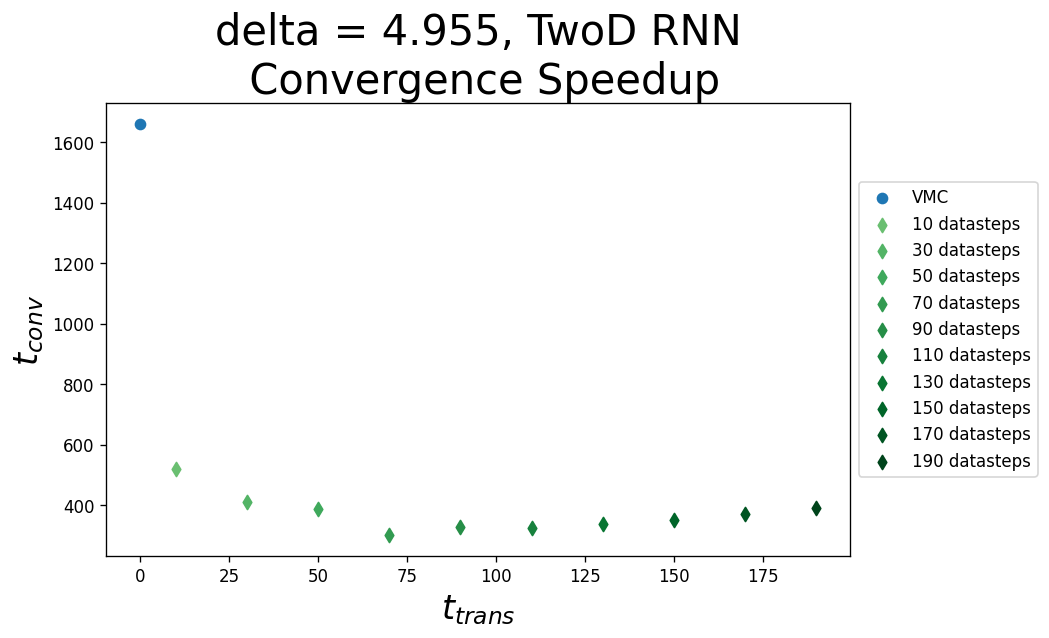

In [49]:
plot_speedup(d_4955,d_4955_2d_VMC,qmcE_4955,'TwoD',d_4955_2d_hybrid_sm,10,20)

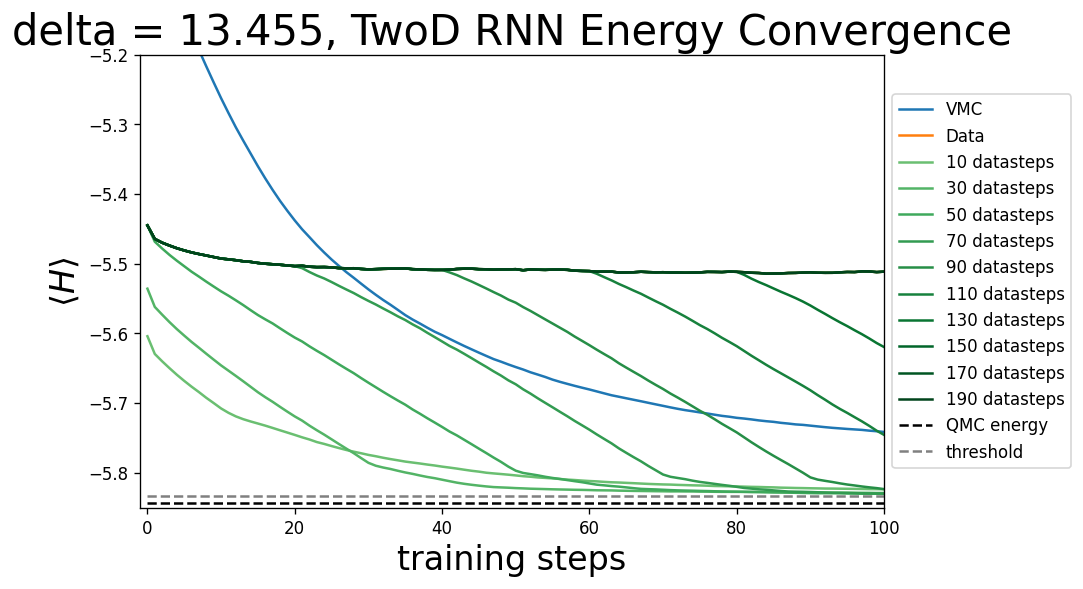

In [50]:
plot_all(d_13455,d_13455_2d_VMC,d_13455_2d_data,qmcE_13455,'TwoD',[-1,100],[-5.85,-5.2],d_13455_2d_hybrid_sm,10,20)

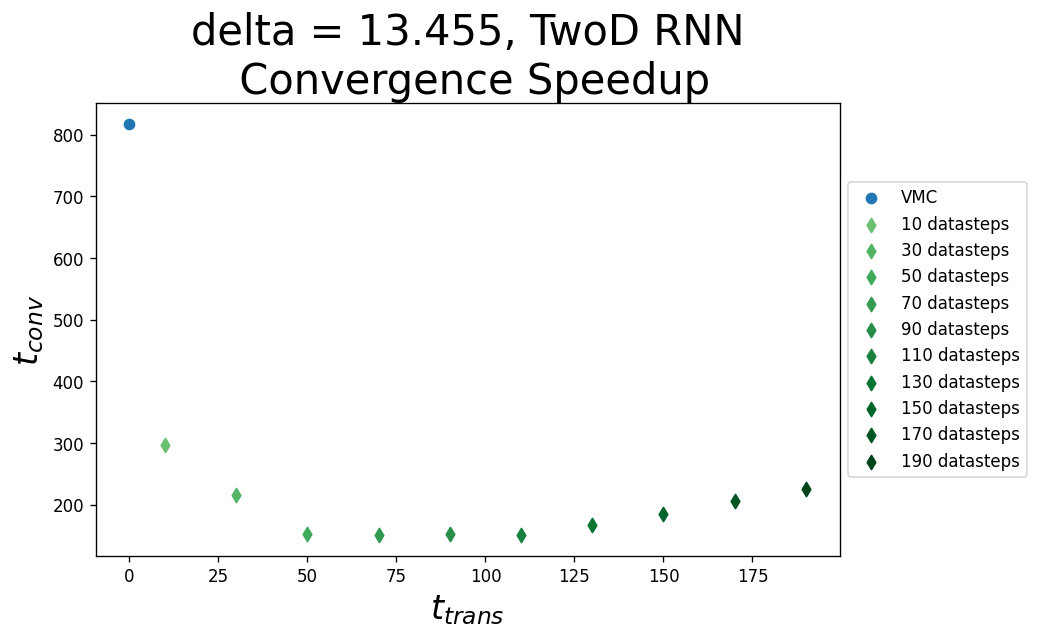

In [51]:
plot_speedup(d_13455,d_13455_2d_VMC,qmcE_13455,'TwoD',d_13455_2d_hybrid_sm,10,20)

# Flatiron Plot (checkerboard phase, all RNNs)

In [14]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

delta = 13.455

# Read in the data
path2 = './../data/N_256/Figure2/TwoD_rnn/delta_'
path1 = './../data/N_256/Figure2/OneD_rnn/delta_'
delta_s = str('%.3f' %delta)
seed = '/seed_100'
VMC = '/VMC_only'
hybrid = '/hybrid_training/'
ds = '_datasteps'
lr = 'lr_0.001/'
lr1 = 'lr_0.0001/'
Energy = '/Energy.npy'
d1_hybrid = './../data/N_256/Figure3/OneD_rnn/delta_13.455/seed_111/hybrid_training/lr_5e-05/1000_datasteps'
Hybrid_train1_smlr = np.load(d1_hybrid+Energy)

window = 50
plot_x = np.arange(1,5001,15)

# 2D
VMC_train2 = np.load(path2+delta_s+seed+VMC+Energy)
Data_train2 = np.load(path2+delta_s+seed+Energy)
Hybrid_train2 = np.load(path2+delta_s+seed+hybrid+'50'+ds+Energy)[0:10000]

VMC_E2 = (movingaverage(VMC_train2,window))
Data_E2 = (movingaverage(Data_train2,window))
plot_x_data2 = np.arange(1,len(Data_E2),15)
Hybrid_E2 = (movingaverage(Hybrid_train2,window))

plot_VMC_E2 = VMC_E2[plot_x]
plot_Data_E2 = Data_E2[plot_x_data2]
plot_Hybrid_E2 = Hybrid_E2[plot_x]

# 1D
VMC_train1 = np.load(path1+delta_s+seed+VMC+Energy)
Data_train1 = np.load(path1+delta_s+seed+Energy)
Hybrid_train1 = np.load(path1+delta_s+seed+hybrid+lr1+'1000'+ds+Energy)[0:10000]

VMC_E1 = (movingaverage(VMC_train1,window))
Data_E1 = (movingaverage(Data_train1,window))
Hybrid_E1 = (movingaverage(Hybrid_train1,window))
Hybrid_E1_smlr = (movingaverage(Hybrid_train1_smlr,window))

plot_VMC_E1 = VMC_E1[plot_x]
plot_Data_E1 = Data_E1[plot_x]
plot_Hybrid_E1 = Hybrid_E1[plot_x]
plot_Hybrid_E1_smlr = Hybrid_E1_smlr[plot_x]



In [15]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


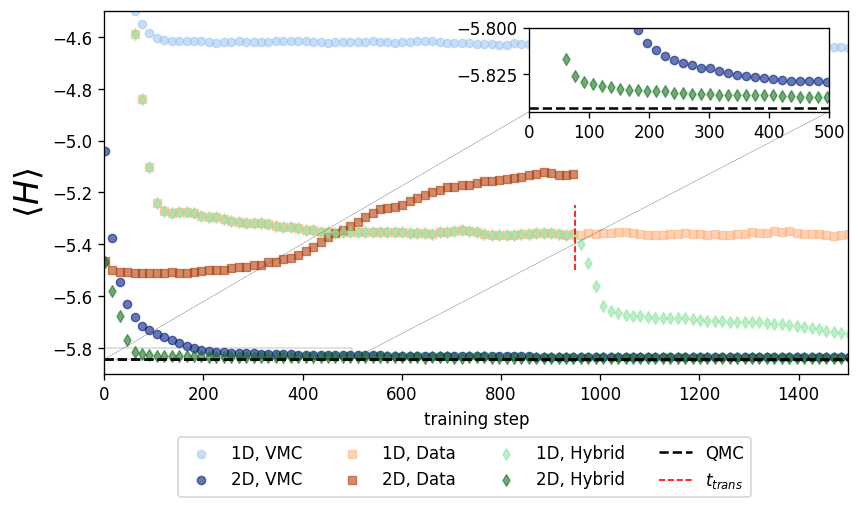

In [17]:
fig = plt.figure(1,figsize=(8,4), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')

grid = plt.GridSpec(1, 1, wspace=0.4, hspace=100.0)
ax1 = fig.add_subplot(grid[0,0])
# axins = inset_axes(ax1, width=1.3, height=0.42, bbox_to_anchor=(.425, 0.56), bbox_transform=ax1.transAxes, loc=3)
axins = inset_axes(ax1, width=2.5, height=0.7, bbox_to_anchor=(.56, 0.7), bbox_transform=ax1.transAxes, loc=3)
mark_inset(ax1, axins, fc='none', ec="0.3", loc1=3, loc2=4, linewidth=0.2, zorder=3)
xcut=1500

### Inset ###
axins.hlines(qmcE_13455,0,xcut,linestyle='--',color='k')
axins.scatter(plot_x,plot_VMC_E2[0:5000],marker = 'o',color=colors2[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[0])
axins.scatter(plot_x,plot_Hybrid_E2[0:5000],marker = 'd',color=colors2[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[2])
axins.set_xlim(0, 500)
axins.set_ylim(-5.845, -5.8)


ax1.hlines(qmcE_13455,0,xcut,linestyle='--',color='k')
# plt.plot(x,VMC_E1[0:5000],color=colors1[0],label="VMC, 1D")
# plt.plot(x,Data_E1[0:5000],color=colors1[1],label="Data, 1D")
# plt.plot(x,Hybrid_E1[0:5000],color=colors1[2],label="Hybrid, 1D")
# plt.plot(x,VMC_E2[0:5000],color=colors2[0],label="VMC, 2D")
# plt.plot(np.arange(len(Data_E2)),Data_E2,color=colors2[1],label="Data, 2D")
# plt.plot(x,Hybrid_E2[0:5000],color=colors2[2],label="Hybrid, 2D")
ax1.scatter(plot_x,plot_VMC_E13[0:5000],marker = 'o',color=colors1[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[0],label="1D, VMC")
ax1.scatter(plot_x,plot_VMC_E2[0:5000],marker = 'o',color=colors2[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[0],label="2D, VMC")

ax1.scatter(plot_x,plot_Data_E1[0:5000],marker = 's',color=colors1[1],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[1],label="1D, Data")
ax1.scatter(plot_x_data2,plot_Data_E2,marker = 's',color=colors2[1],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[1],label="2D, Data")

ax1.scatter(plot_x,plot_Hybrid_E1[0:5000],marker = 'd',color=colors1[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors1[2],label="1D, Hybrid")
ax1.scatter(plot_x,plot_Hybrid_E2[0:5000],marker = 'd',color=colors2[2],s=25,alpha=0.6,linewidths=0.8,edgecolors=colors2[2],label="2D, Hybrid")
ax1.hlines(qmcE_13455,0,xcut,linestyle='--',color='k',label="QMC")
ax1.vlines(950, ymin=-5.5, ymax=-5.25, linestyle='--', color='r', linewidth=1,label='$t_{trans}$')
ax1.set_ylim(-5.9,-4.5)
ax1.set_xlim(0,xcut)

fig.legend(loc='center', bbox_to_anchor=(0.5, -0.07),ncol=4,fontsize=10)
# plt.legend()
ax1.set_xlabel("training step")
ax1.set_ylabel("$\\langle H \\rangle$",fontsize=20)
# plt.title("RNNs Learning the Checkerboard Phase")
plt.show()

# Paper Plot (2D RNN)

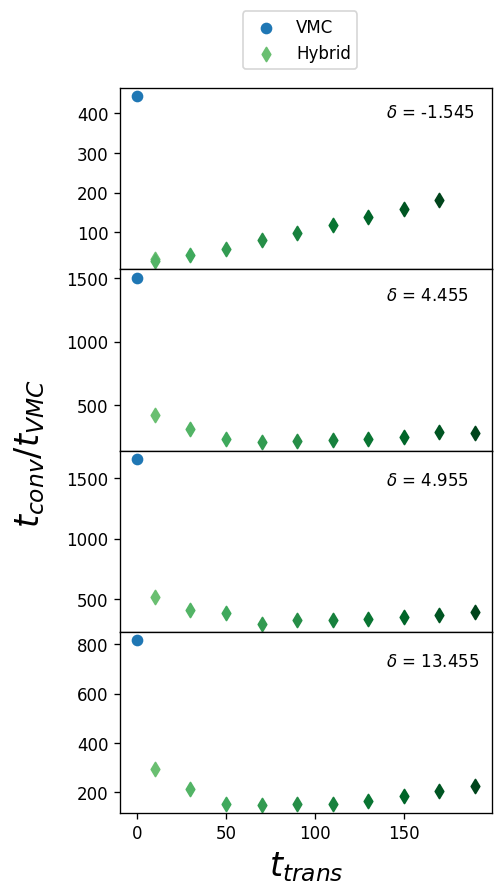

In [52]:
fig = plt.figure(1,figsize=(4,8), dpi=120, facecolor='w', edgecolor='k')
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0],sharex=ax1)
ax3 = fig.add_subplot(grid[2,0],sharex=ax1)
ax4 = fig.add_subplot(grid[3,0],sharex=ax1)
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
thresh = 0.01
ds_start = 10
ds_step = 20

# delta=-1.545
ax1.text(140, 390, "$\\delta$ = -1.545",fontsize=10)
tconv_VMC1 = np.where(ma(d_m1545_2d_VMC)<=qmcE_m1545+thresh)[0][0]
ax1.scatter(0,tconv_VMC1,marker='o',color='C0',label="VMC")
num_trains = np.shape(d_m1545_2d_hybrid_sm)[0]
ds = ds_start
tconv = np.where(ma(d_m1545_2d_hybrid_sm[0,:])<=qmcE_m1545+thresh)[0][0]
ax1.scatter(ds,tconv,marker = 'd',color=greens[0],label=f'Hybrid')
for i in range(1,num_trains):
    tconv = np.where(ma(d_m1545_2d_hybrid_sm[i,:])<=qmcE_m1545+thresh)[0][0]
    ax1.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
# delta=4.455
ax2.text(140, 1325, "$\\delta$ = 4.455",fontsize=10)
tconv_VMC2 = np.where(ma(d_4455_2d_VMC)<=qmcE_4455+thresh)[0][0]
ax2.scatter(0,tconv_VMC2,marker='o',color='C0')
num_trains = np.shape(d_4455_2d_hybrid_sm)[0]
ds = ds_start
for i in range(num_trains):
    tconv = np.where(ma(d_4455_2d_hybrid_sm[i,:])<=qmcE_4455+thresh)[0][0]
    ax2.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step

# delta=4.955
ax3.text(140, 1440, "$\\delta$ = 4.955",fontsize=10)
tconv_VMC3 = np.where(ma(d_4955_2d_VMC)<=qmcE_4955+thresh)[0][0]
ax3.scatter(0,tconv_VMC3,marker='o',color='C0')
num_trains = np.shape(d_4955_2d_hybrid_sm)[0]
ds = ds_start
for i in range(0,num_trains):
    tconv = np.where(ma(d_4955_2d_hybrid_sm[i,:])<=qmcE_4955+thresh)[0][0]
    ax3.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
# delta=13.455
ax4.text(140, 710, "$\\delta$ = 13.455",fontsize=10)
tconv_VMC4 = np.where(ma(d_13455_2d_VMC)<=qmcE_13455+thresh)[0][0]
ax4.scatter(0,tconv_VMC4,marker='o',color='C0')
num_trains = np.shape(d_13455_2d_hybrid_sm)[0]
ds = ds_start
for i in range(num_trains):
    tconv = np.where(ma(d_13455_2d_hybrid_sm[i,:])<=qmcE_13455+thresh)[0][0]
    ax4.scatter(ds,tconv,marker = 'd',color=greens[i])
    ds+=ds_step
    
    
fig.legend(loc='center', bbox_to_anchor=(0.5, 0.93))
# fig.suptitle(f'2D RNN Convergence Speedup',fontsize=25)
plt.xlabel('$ t_{trans} $',fontsize=20)
fig.text(-0.1, 0.5, '$t_{conv}/t_{VMC}$', va='center', rotation='vertical',fontsize=20)
plt.show()

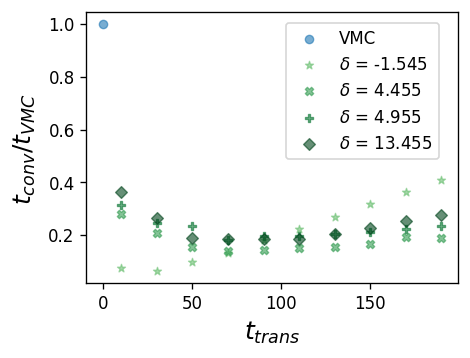

In [97]:
fig = plt.figure(1,figsize=(4,3), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
thresh = 0.01
ds_start = 10
ds_step = 20

# delta=-1.545
# plt.text(140, 0.9, "$\\delta$ = -1.545",fontsize=10)
tconv_VMC1 = np.where(ma(d_m1545_2d_VMC)<=qmcE_m1545+thresh)[0][0]
plt.scatter(0,1,marker='o',color='C0',s=25,alpha=0.6,linewidths=0.8,edgecolors='C0',label="VMC")
num_trains = np.shape(d_m1545_2d_hybrid_sm)[0]
ds = ds_start
tconv = np.where(ma(d_m1545_2d_hybrid_sm[0,:])<=qmcE_m1545+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC1,marker = '*',color=greens[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[0],label=f'$\\delta$ = -1.545')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_m1545_2d_hybrid_sm[i,:])<=qmcE_m1545+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC1,marker = '*',color=greens[0],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[0])
    ds+=ds_step
    
# delta=4.455
# plt.text(140, 0.9, "$\\delta$ = 4.455",fontsize=10)
tconv_VMC2 = np.where(ma(d_4455_2d_VMC)<=qmcE_4455+thresh)[0][0]
# plt.scatter(0,1,marker='o',color='C0')
num_trains = np.shape(d_4455_2d_hybrid_sm)[0]
ds = ds_start
tconv = np.where(ma(d_4455_2d_hybrid_sm[0,:])<=qmcE_4455+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC2,marker = 'X',color=greens[3],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[3],label=f'$\\delta$ = 4.455')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_4455_2d_hybrid_sm[i,:])<=qmcE_4455+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC2,marker = 'X',color=greens[3],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[3])
    ds+=ds_step

# delta=4.955
# plt.text(140, 0.9, "$\\delta$ = 4.955",fontsize=10)
tconv_VMC3 = np.where(ma(d_4955_2d_VMC)<=qmcE_4955+thresh)[0][0]
# plt.scatter(0,1,marker='o',color='C0')
num_trains = np.shape(d_4955_2d_hybrid_sm)[0]
ds = ds_start
tconv = np.where(ma(d_4955_2d_hybrid_sm[0,:])<=qmcE_4955+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC3,marker = 'P',color=greens[6],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[6],label=f'$\\delta$ = 4.955')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_4955_2d_hybrid_sm[i,:])<=qmcE_4955+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC3,marker = 'P',color=greens[6],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[6])
    ds+=ds_step
    
# delta=13.455
# ax4.text(140, 0.9, "$\\delta$ = 13.455",fontsize=10)
tconv_VMC4 = np.where(ma(d_13455_2d_VMC)<=qmcE_13455+thresh)[0][0]
# plt.scatter(0,1,marker='o',color='C0')
num_trains = np.shape(d_13455_2d_hybrid_sm)[0]
ds = ds_start
tconv = np.where(ma(d_13455_2d_hybrid_sm[0,:])<=qmcE_13455+thresh)[0][0]
plt.scatter(ds,tconv/tconv_VMC4,marker = 'D',color=greens[9],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[9],label=f'$\\delta$ = 13.455')
ds+=ds_step
for i in range(1,num_trains):
    tconv = np.where(ma(d_13455_2d_hybrid_sm[i,:])<=qmcE_13455+thresh)[0][0]
    plt.scatter(ds,tconv/tconv_VMC4,marker = 'D',color=greens[9],s=25,alpha=0.6,linewidths=0.8,edgecolors=greens[9])
    ds+=ds_step
    
    
fig.legend(loc='center',bbox_to_anchor=(0.7, 0.66))
# fig.suptitle(f'2D RNN Convergence Speedup',fontsize=25)
plt.xlabel('$ t_{trans} $',fontsize=15)
fig.text(-0.03, 0.5, '$t_{conv}/t_{VMC}$', va='center', rotation='vertical',fontsize=15)
plt.show()

Can think about putting all these on the same plot and rescaling the y axis by the max value (ie the VMC convergence time)

# Paper Plot 1D RNN

In [16]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [17]:
def GetBestEs1(delta,moving_avg_fxn,window):
    
    # Read in the data
    path1 = './../data/N_256/Figure3/OneD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_5e-05/'
    Energy = '/Energy.npy'
    
    VMC_train1 = np.load(path1+delta_s+seed+VMC+Energy)
    Data_train1 = np.load(path1+delta_s+seed+Energy)
#     Hybrid_trains1 = np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
#     Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
#     Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains1 = np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'1000'+ds+Energy))

    # Take best of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    Data_E = np.min(moving_avg_fxn(Data_train1,window))
#     Hybrid100_E = np.min(moving_avg_fxn(Hybrid_trains1[0,:],window))
#     Hybrid200_E = np.min(moving_avg_fxn(Hybrid_trains1[1,:],window))
#     Hybrid500_E = np.min(moving_avg_fxn(Hybrid_trains1[2,:],window))
    Hybrid1000_E = np.min(moving_avg_fxn(Hybrid_trains1[0,:],window))
    
    return VMC_E, Data_E, Hybrid1000_E #Hybrid100_E, Hybrid200_E, Hybrid500_E, 

def GetBestEs2(delta,moving_avg_fxn,window):
    
    # Read in the data
    path2 = './../data/N_256/Figure3/TwoD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_0.001/'
    Energy = '/Energy.npy'
    VMC_train2 = np.load(path2+delta_s+seed+VMC+Energy)
    Data_train2 = np.load(path2+delta_s+seed+Energy)
    Hybrid_trains2 = np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'1000'+ds+Energy)[0:10000]),axis=0)
    
    # Take best of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train2,window))
    Data_E = np.min(moving_avg_fxn(Data_train2,window))
    Hybrid100_E = np.min(moving_avg_fxn(Hybrid_trains2[0,:],window))
    Hybrid200_E = np.min(moving_avg_fxn(Hybrid_trains2[1,:],window))
    Hybrid500_E = np.min(moving_avg_fxn(Hybrid_trains2[2,:],window))
    Hybrid1000_E = np.min(moving_avg_fxn(Hybrid_trains2[3,:],window))
    
    return VMC_E, Data_E, Hybrid100_E, Hybrid200_E, Hybrid500_E, Hybrid1000_E

In [18]:
vmces1 = []
dataes1 = []
hy100es1 = []
hy200es1 = []
hy500es1 = []
hy1000es1 = []
vmces2 = []
dataes2 = []
hy100es2 = []
hy200es2 = []
hy500es2 = []
hy1000es2 = []

for delta_ in deltas:
#     vmce1, datae1, hy100_1, hy200_1, hy500_1, hy1000_1 = GetBestEs1(delta_,movingaverage,50)
    vmce1, datae1, hy1000_1 = GetBestEs1(delta_,movingaverage,50)
    vmce2, datae2, hy100_2, hy200_2, hy500_2, hy1000_2 = GetBestEs2(delta_,movingaverage,50)
    
    vmces1.append(vmce1)
    dataes1.append(datae1)
#     hy100es1.append(hy100_1)
#     hy200es1.append(hy200_1)
#     hy500es1.append(hy500_1)
    hy1000es1.append(hy1000_1)
    vmces2.append(vmce2)
    dataes2.append(datae2)
    hy100es2.append(hy100_2)
    hy200es2.append(hy200_2)
    hy500es2.append(hy500_2)
    hy1000es2.append(hy1000_2)


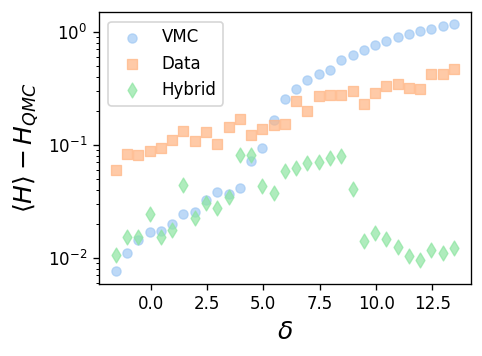

In [19]:
fig = plt.figure(1,figsize=(4,3), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')

plt.scatter(deltas,abs(vmces1-energies),marker = 'o',color=colors1[0],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[0],label="VMC")
plt.scatter(deltas,abs(dataes1-energies),marker = 's',color=colors1[1],s=30,alpha=0.7,linewidths=0.8,edgecolors=colors1[1],label="Data")
plt.scatter(deltas,abs(hy1000es1-energies),marker = 'd',color=colors1[2],s=40,alpha=0.7,linewidths=0.8,edgecolors=colors1[2],label="Hybrid")
# plt.scatter(deltas,abs(hy100es1-energies),marker = 'd',color=greens[0],label="Hybrid")
# plt.scatter(deltas,abs(hy200es1-energies),marker = 'd',color=greens[2])
# plt.scatter(deltas,abs(hy500es1-energies),marker = 'd',color=greens[4])

plt.legend(loc='center', bbox_to_anchor=(0.18, 0.81))
# plt.title(f'Energy Residuals (1D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle - H_{QMC}$',fontsize=15)
plt.xlabel('$\\delta$',fontsize=15)
plt.yscale('log')
plt.show()

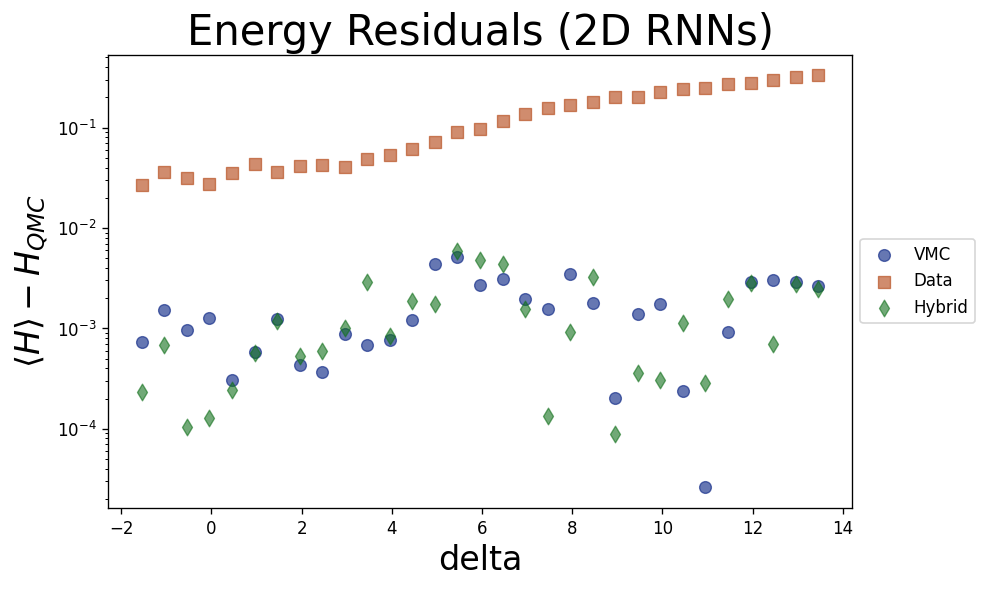

In [88]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
colors2 = sns.color_palette('dark')
plt.scatter(deltas,abs(vmces2-energies),marker = 'o',color=colors2[0],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[0],label="VMC")
plt.scatter(deltas,abs(dataes2-energies),marker = 's',color=colors2[1],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[1],label="Data")
plt.scatter(deltas,abs(hy100es2-energies),marker = 'd',color=colors2[2],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[2],label="Hybrid")
# plt.scatter(deltas,abs(hy200es2-energies),marker = 'd',color=greens[2],label="Hybrid, 200")
# plt.scatter(deltas,abs(hy500es2-energies),marker = 'd',color=greens[4],label="Hybrid, 500")
# plt.scatter(deltas,abs(hy1000es2-energies),marker = 'd',color=greens[6],label="Hybrid, 1000")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Energy Residuals (2D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle - H_{QMC}$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.yscale('log')
plt.show()

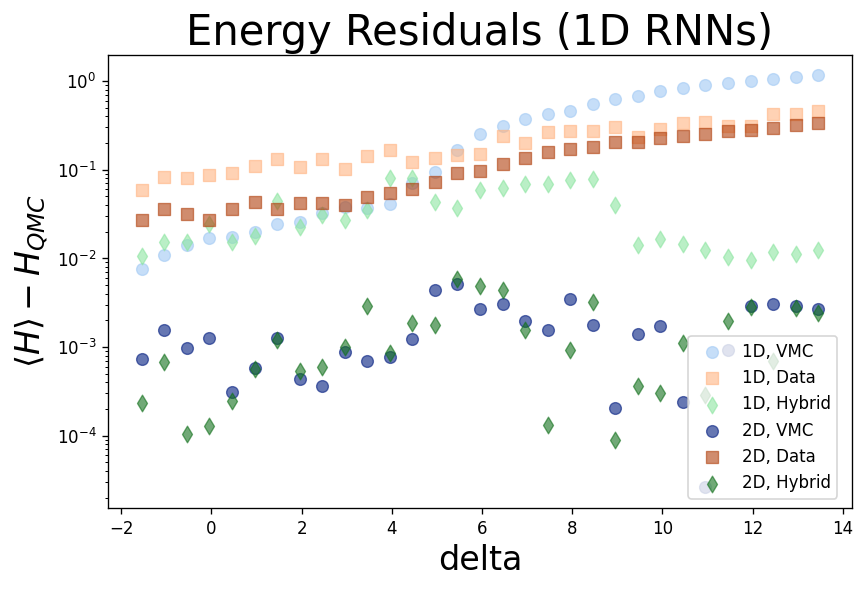

In [89]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')

plt.scatter(deltas,abs(vmces1-energies),marker = 'o',color=colors1[0],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors1[0],label="1D, VMC")
plt.scatter(deltas,abs(dataes1-energies),marker = 's',color=colors1[1],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors1[1],label="1D, Data")
plt.scatter(deltas,abs(hy1000es1-energies),marker = 'd',color=colors1[2],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors1[2],label="1D, Hybrid")
plt.scatter(deltas,abs(vmces2-energies),marker = 'o',color=colors2[0],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[0],label="2D, VMC")
plt.scatter(deltas,abs(dataes2-energies),marker = 's',color=colors2[1],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[1],label="2D, Data")
plt.scatter(deltas,abs(hy100es2-energies),marker = 'd',color=colors2[2],s=50,alpha=0.6,linewidths=0.8,edgecolors=colors2[2],label="2D, Hybrid")

plt.legend(loc='center', bbox_to_anchor=(0.88, 0.2))
plt.title(f'Energy Residuals (1D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle - H_{QMC}$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.yscale('log')
plt.show()